In [1]:
#This notebook was created while following along with the article
#    "The Art of Effective Visualization of Multi-dimensional Data".
#Link to article:
#    https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

#formats nicely
%matplotlib inline

#Load data
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [2]:
#Look at white wine data
white_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [3]:
#Look at red wine data
red_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
#Preprocessing
#    combine into single dataset, adding type and
#    qualitative rating attributes


#Make a 'type' attribute to distinguish after combined
red_wine['type'] = 'red'
white_wine['type'] = 'white'

#Add qualitative attribute and labels for wine quality

categorizer = lambda value: 'low' if value <= 4 else 'medium' if value <= 7 else 'high'

red_wine['quality label'] = red_wine['quality'].apply(categorizer)
red_wine['quality label'] = pd.Categorical(red_wine['quality label'], categories=['low', 'medium', 'high'])
white_wine['quality label'] = white_wine['quality'].apply(categorizer)
white_wine['quality label'] = pd.Categorical(white_wine['quality label'], categories=['low', 'medium', 'high'])

#Merge datasets
wines = pd.concat([red_wine, white_wine])

#Shuffle so that the red and white wine categories are intermixed, and not
#    in their own separate blocks
wines = wines.sample(frac=1).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality label
0,11.1,0.440,0.42,2.2,0.064,14.0,19.0,0.99758,3.25,0.57,10.4,6,red,medium
1,7.8,0.300,0.74,1.8,0.033,33.0,156.0,0.99100,3.29,0.52,12.8,6,white,medium
2,6.3,0.255,0.37,1.1,0.040,37.0,114.0,0.99050,3.00,0.39,10.9,6,white,medium
3,6.8,0.220,0.31,6.9,0.037,33.0,121.0,0.99176,3.02,0.39,11.9,8,white,high
4,8.0,0.520,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.2,5,red,medium


In [5]:
#Summary statistics of a subset of attributes of each of the red and white wines

subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = red_wine[subset_attributes].describe().round(2)
ws = white_wine[subset_attributes].describe().round(2)
pd.concat([rs, ws], axis=1, keys=['Red Wine', 'White Wine'])

Red Wine                                                           \
      residual sugar total sulfur dioxide sulphates  alcohol volatile acidity   
count        1599.00              1599.00   1599.00  1599.00          1599.00   
mean            2.54                46.47      0.66    10.42             0.53   
std             1.41                32.90      0.17     1.07             0.18   
min             0.90                 6.00      0.33     8.40             0.12   
25%             1.90                22.00      0.55     9.50             0.39   
50%             2.20                38.00      0.62    10.20             0.52   
75%             2.60                62.00      0.73    11.10             0.64   
max            15.50               289.00      2.00    14.90             1.58   

                   White Wine                                          \
       quality residual sugar total sulfur dioxide sulphates  alcohol   
count  1599.00        4898.00              4898.00   4898.00  4898.00   
mean      5.64           6.39               138.36      0.49    10.51   
std       0.81           5.07                42.50      0.11     1.23   
min       3.00           0.60                 9.00      0.22     8.00   
25%       5.00           1.70               108.00      0.41     9.50   
50%       6.00           5.20               134.00      0.47    10.40   
75%       6.00           9.90               167.00      0.55    11.40   
max       8.00          65.80               440.00      1.08    14.20   

                                 
      volatile acidity  quality  
count          4898.00  4898.00  
mean              0.28     5.88  
std               0.10     0.89  
min               0.08     3.00  
25%               0.21     5.00  
50%               0.26     6.00  
75%               0.32     6.00  
max               1.10     9.00

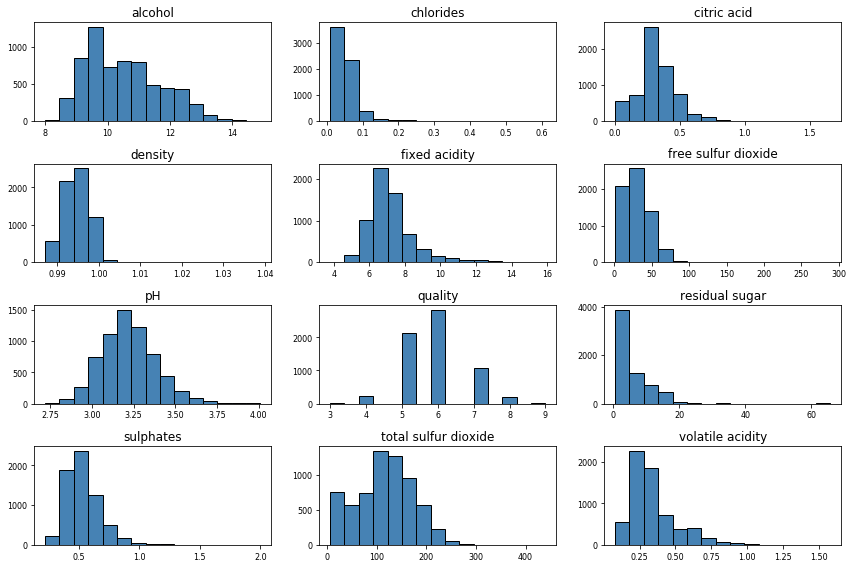

In [6]:
#Display histograms of each attribute

wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2)) 

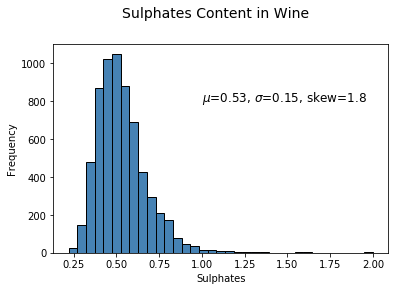

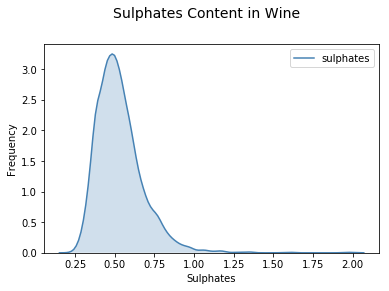

In [7]:
#Draw histogram and density plot for a continuous attribute (sulphates content)

#Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2))+r', $\sigma$='+str(round(wines['sulphates'].std(),2))+', skew='+str(round(wines['sulphates'].skew(),2)), fontsize=12)

freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=35, edgecolor='black', linewidth=1)

#Density
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

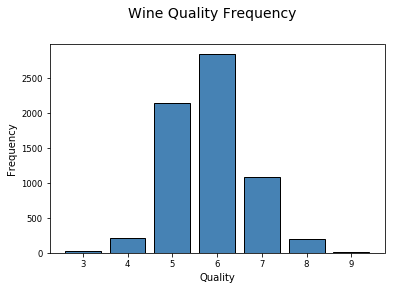

In [8]:
#Bar plot for a categorical attribute (quality)

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

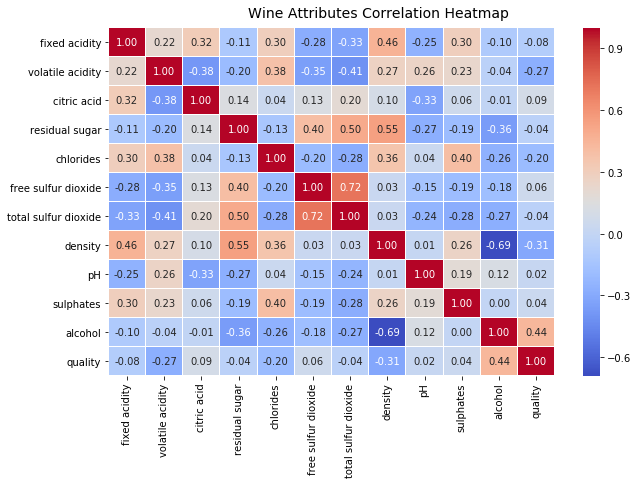

In [9]:
#Create a heat map of correlation between attributes

f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(corr.round(2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


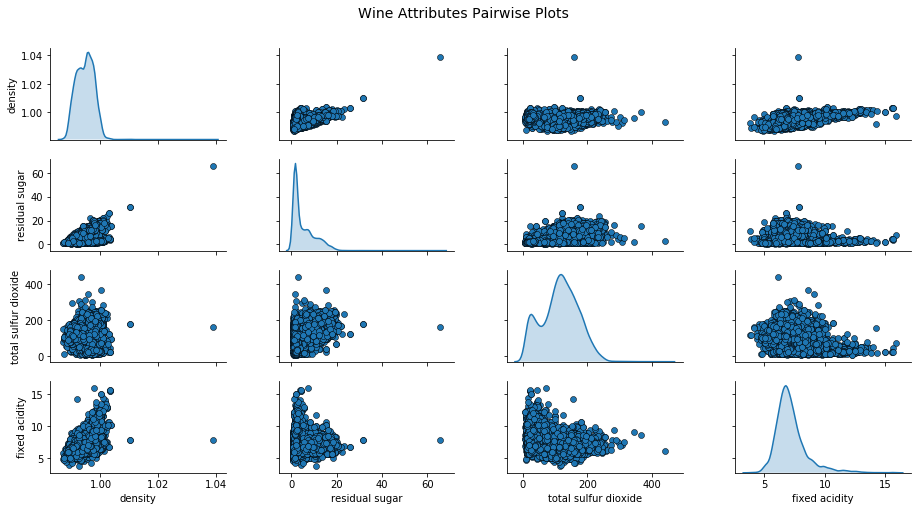

In [10]:
# Pair-wise Scatter Plots

cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.9, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

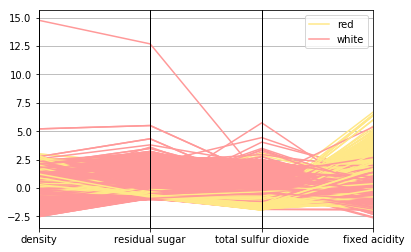

In [11]:
#Parallel coordinates plot

cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

#Normalize
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['type']], axis=1)
final_df.head()

#Draw plot
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'type', color=('#FFE888', '#FF9999'))

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


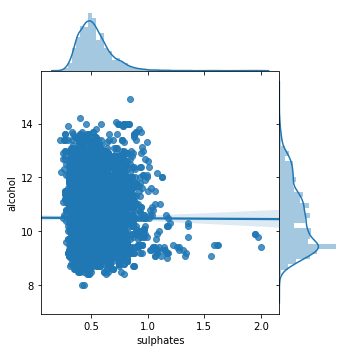

In [12]:
#Joint plot

_ = sns.jointplot(x='sulphates', y='alcohol', data=wines,
kind='reg', space=0, height=5, ratio=4)


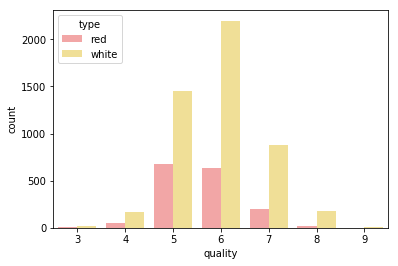

In [13]:
#Multi-bar plot: quality distribution v.s. wine type

_ = sns.countplot(x="quality", hue="type", data=wines, 
palette={"red": "#FF9999", "white": "#FFE888"})

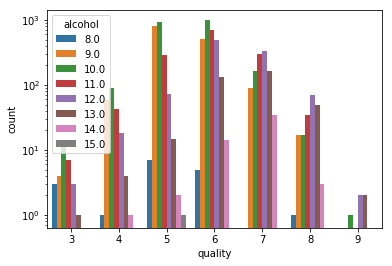

In [14]:
#Multi-bar plot: quality distribution v.s. alcohol content


_ = sns.countplot(x="quality", hue="alcohol", data=wines.round(0), log=True)

Text(0,0.5,'Wine Sulphates')

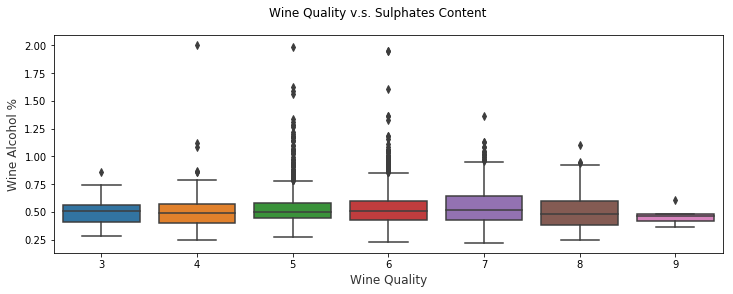

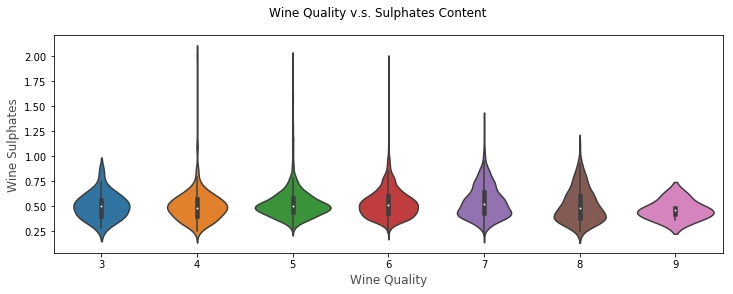

In [15]:
#Box and violin plots

#Box
f, ax = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality v.s. Sulphates Content')

sns.boxplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

#Violin
f, ax = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality v.s. Sulphates Content')

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.7)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.7)

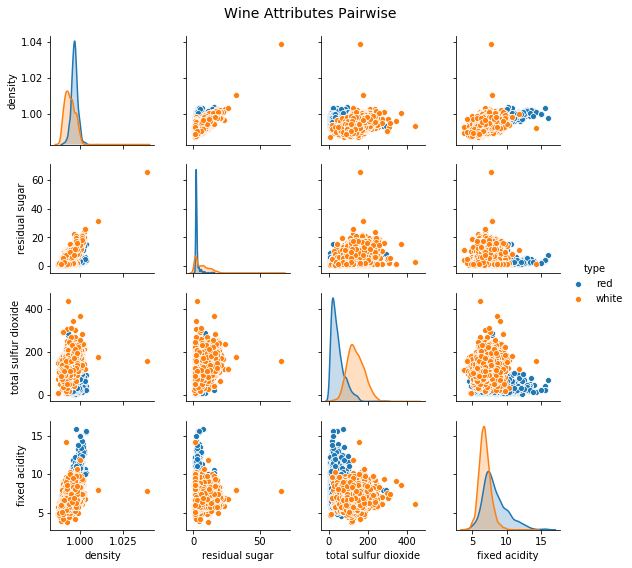

In [20]:
# Visualize three dimensions in the data set at once by assigning points a color based on variable value (hue argument).

cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'type']
pp = sns.pairplot(wines[cols], hue='type', height=2)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise', fontsize=14)


Text(0.5,0,'Alcohol')

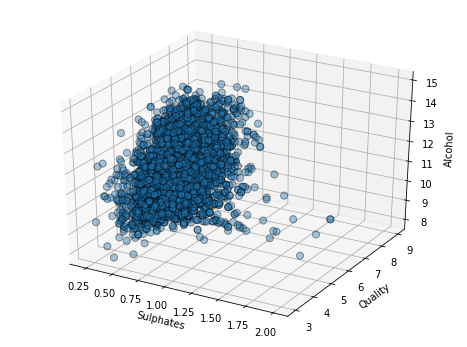

In [26]:
# Visualize data in 3D space.

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['sulphates']
ys = wines['quality']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.4, edgecolors='k')

ax.set_xlabel('Sulphates')
ax.set_ylabel('Quality')
ax.set_zlabel('Alcohol')